In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Max =[ 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [3]:
months=np.arange(12)

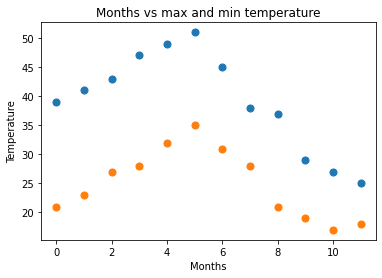

In [4]:
plt.scatter(x=months,y=Max,marker="o",s=50)
plt.scatter(x=months,y=Min,marker="o",s=50)
plt.title("Months vs max and min temperature")
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.show()

In [5]:
from scipy import optimize
def yearly_temps(times, avg,ampl,time_offset):
    return (avg+ ampl*np.cos((times+time_offset)*2*np.pi/times.max()))
res_max,cov_max=optimize.curve_fit(yearly_temps,months,Max,[20,10,0])
res_min,cov_min=optimize.curve_fit(yearly_temps,months,Min,[-40,20,0])

In [6]:
days= np.linspace(0,12,365)

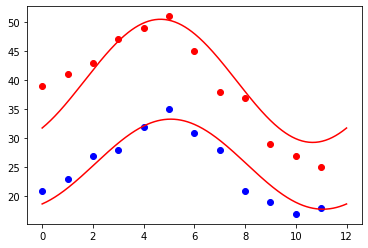

In [7]:
plt.plot(months,Max,"ro")
plt.plot(months,Min,"bo")
plt.plot(days,yearly_temps(days,*res_max),"r-")
plt.plot(days,yearly_temps(days,*res_min),"r-")

In [8]:
data=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [9]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


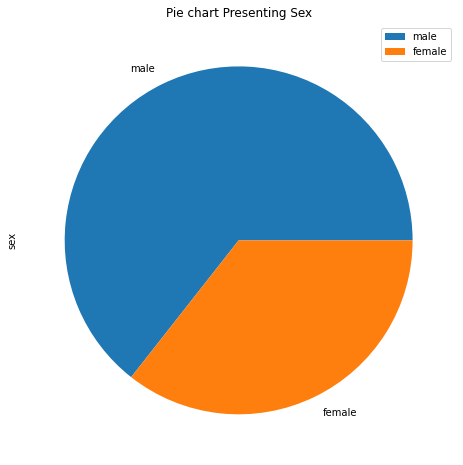

In [10]:
plt.figure(figsize=(10,8))
data.sex.value_counts().plot(kind="pie")
plt.title("Pie chart Presenting Sex")
plt.legend()
plt.grid()

In [27]:
import matplotlib.patches as mpatches
red_patch=mpatches.Patch(color="blue",label="Male")
blue_patch=mpatches.Patch(color="red",label="Female")


In [13]:
data.sex.fillna("male",inplace=True)

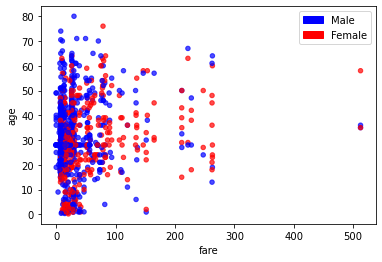

In [28]:
data.plot.scatter(x="fare",y="age",c=data["sex"].map({"male":"b","female":"r"}),alpha=0.7)
plt.legend(handles=[red_patch,blue_patch])

In [20]:
data.fare.fillna(data.fare.median(),inplace=True)